In [ ]:
#Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Preprocess data
X_train = X_train.reshape(-1,28,28,1).astype('float32') / 255.0
X_test = X_test.reshape(-1,28,28,1).astype('float32') / 255.0

In [ ]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model (use small epochs for speed; can increase for higher accuracy)
history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step - accuracy: 0.8729 - loss: 0.4223 - val_accuracy: 0.9785 - val_loss: 0.0679
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9840 - val_loss: 0.0520
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 61ms/step - accuracy: 0.9865 - loss: 0.0429 - val_accuracy: 0.9863 - val_loss: 0.0412
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 56ms/step - accuracy: 0.9905 - loss: 0.0299 - val_accuracy: 0.9914 - val_loss: 0.0274
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9906 - val_loss: 0.0277


In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 3s - 9ms/step - accuracy: 0.9906 - loss: 0.0277

Test Accuracy: 0.9906


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


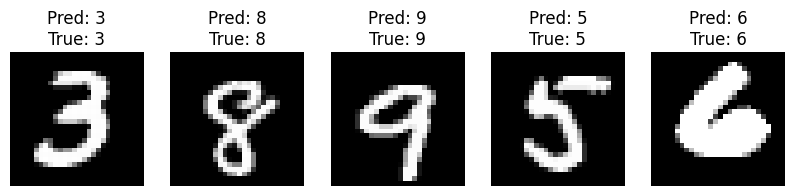

In [ ]:
# Visualize predictions on 5 sample images
sample_idx = np.random.choice(len(X_test), 5, replace=False)
sample_images = X_test[sample_idx]
sample_labels = y_test[sample_idx]
predictions = model.predict(sample_images)

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.show()